참고1: https://devhwi.tistory.com/30
참고2: https://chloelab.tistory.com/25

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras


import os

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_df = pd.read_csv("/content/train (1).csv", index_col=None)

test_df = pd.read_csv("/content/test (1).csv", index_col=None)

In [ ]:
train_df[55:80]

,id,keyword,location,text,target
55,79,ablaze,USA,#Kurds trampling on Turkmen flag later set it ...,1
56,80,ablaze,South Africa,TRUCK ABLAZE : R21. VOORTREKKER AVE. OUTSIDE O...,1
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0
58,82,ablaze,hollywoodland,They sky was ablaze tonight in Los Angeles. I'...,0
59,83,ablaze,"Edmonton, Alberta - Treaty 6",How the West was burned: Thousands of wildfire...,1
60,85,ablaze,NaN,Revel in yours wmv videos by means of mac fare...,0
61,86,ablaze,Inang Pamantasan,Progressive greetings!\n\nIn about a month stu...,0
62,89,ablaze,Twitter Lockout in progress,Rene Ablaze &amp; Jacinta - Secret 2k13 (Falle...,0
63,91,ablaze,"Concord, CA",@Navista7 Steve these fires out here are somet...,1
64,92,ablaze,"Calgary, AB",#NowPlaying: Rene Ablaze &amp; Ian Buff - Magn...,0


In [ ]:
train_df.info()

In [ ]:
train_df["target"].value_counts().plot.barh()

In [ ]:
train_df.isna().sum()

In [ ]:
test_df.head(30)

In [ ]:
test_df.info()

In [ ]:
test_df.isna().sum()

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.6 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

train_data = load_dataset("csv", data_files="/content/train (1).csv",
                          delimiter=",", split="train[:80%]")

val_data = load_dataset("csv", data_files="/content/train (1).csv",
                          delimiter=",", split="train[80%:]")

test_data = load_dataset("csv",  data_files="/content/test (1).csv",
                          delimiter=",")

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
import nltk
import re


def clean_text(data):
    text = data["text"]
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove sepical characters
    text = text.strip()  # Remove spaces at end and beginning
    text = re.sub(r'\s+', ' ', text)  # Remove unnecessary spaces
    text = text.lower()  # lower cases
    data["text"] = text
    return data

In [ ]:
train_data_clean = train_data.map(clean_text)
val_data_clean = val_data.map(clean_text)
test_data_clean = test_data["train"].map(clean_text)

Map:   0%|          | 0/6090 [00:00<?, ? examples/s]

Map:   0%|          | 0/1523 [00:00<?, ? examples/s]

Map:   0%|          | 0/3263 [00:00<?, ? examples/s]

In [ ]:
train_data_clean["text"][:10]

In [ ]:
val_data_clean["text"][:10]

In [ ]:
test_data_clean["text"][:10]

# Import pre-trained Model

In [ ]:
!pip install transformers

import transformers
from transformers import AutoTokenizer, TFAutoModel

## Tokenizer

In [ ]:
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### Let's get some information about the tokenizer

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

In [ ]:
tokenizer.model_input_names

### Testing the Tokenizer

In [ ]:
test = "Tokenizing is important for NLP"
tokenized_test = tokenizer(test)
print(tokenized_test)

{'input_ids': [101, 19204, 6026, 2003, 2590, 2005, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
def tokenize(data):
    return tokenizer(data["text"], padding="max_length", truncation=True, return_tensors="tf")

In [ ]:
train_data_encoded = train_data_clean.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/6090 [00:00<?, ? examples/s]

In [ ]:
val_data_encoded = val_data_clean.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/1523 [00:00<?, ? examples/s]

In [ ]:
test_data_encoded = test_data_clean.map(tokenize, batched = True, batch_size = None)

Map:   0%|          | 0/3263 [00:00<?, ? examples/s]

In [ ]:
train_data_encoded

Dataset({
    features: ['id', 'keyword', 'location', 'text', 'target', 'input_ids', 'attention_mask'],
    num_rows: 6090
})

In [ ]:
val_data_encoded

In [ ]:
test_data_encoded

## Model DistilBert (0.8046)

In [ ]:
dbert = TFAutoModel.from_pretrained(model_name, from_pt=True)

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


### Feature Extraction

Use hidden states as features.
Freeze the body's weights during training.

요약
토크나이즈: 텍스트 데이터를 BERT 입력 형식으로 변환합니다.
히든 스테이트 추출: BERT 모델을 통해 입력 텍스트의 히든 스테이트를 추출합니다.
데이터셋 전처리: 추출된 히든 스테이트를 데이터셋에 맵핑합니다.
UMAP을 통한 시각화: 히든 스테이트를 2차원으로 축소하고 시각화합니다.

In [ ]:
def extract_hidden_states(batch):
    inputs = tokenizer(batch["text"], padding=True,
                       truncation=True, return_tensors='tf')
    outputs = dbert(inputs)
    hidden_states = outputs.last_hidden_state[:, 0].numpy()
    return {"hidden_states": hidden_states}

In [ ]:
train_data_hidden = train_data_encoded.map(extract_hidden_states, batched=True)

val_data_hidden = val_data_encoded.map(extract_hidden_states, batched = True)

test_data_hidden = test_data_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/6090 [00:00<?, ? examples/s]

Map:   0%|          | 0/1523 [00:00<?, ? examples/s]

Map:   0%|          | 0/3263 [00:00<?, ? examples/s]

In [ ]:
X_train = np.array(train_data_hidden["hidden_states"])
X_val = np. array(val_data_hidden["hidden_states"])

y_train = np.array(train_data_hidden["target"])
y_val = np.array(val_data_hidden["target"])

In [ ]:
X_train.shape

(6090, 768)

In [ ]:
X_val.shape

(1523, 768)

### Training a base Model using the hidden states

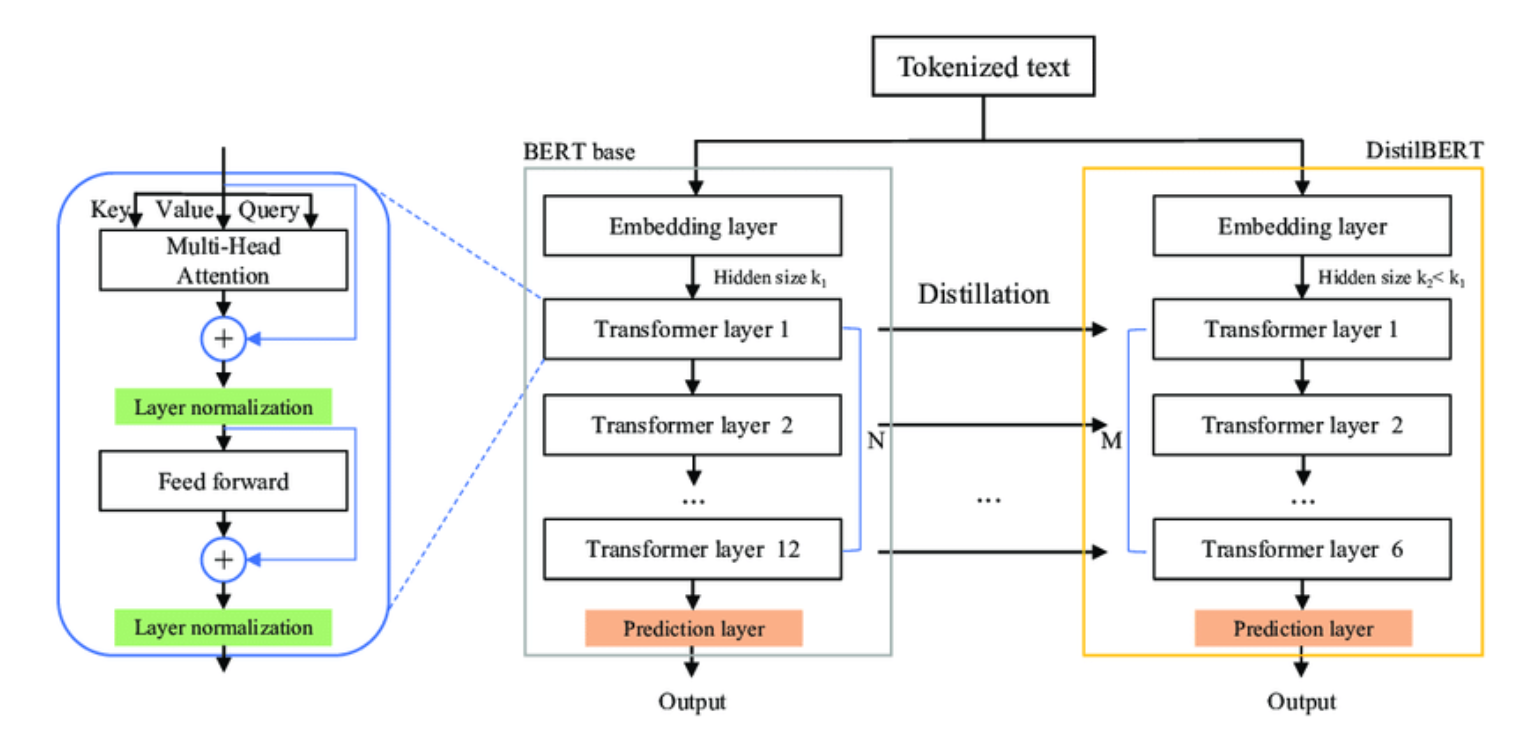

In [ ]:
from xgboost import XGBClassifier


In [ ]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)

print(y_val)
print(y_train)

[0 1 0 ... 1 1 1]
[1 1 1 ... 0 0 0]


In [ ]:
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

xgb_clf.score(X_val, y_val)

0.8128693368351937

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confusion_matrix_plot(y_pred, y_true, labels, clf):
    cm = confusion_matrix(y_true, y_pred, normalize="true")
    fig, ax = plt.subplots(figsize=(6,6))
    confm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels)
    confm.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title(f"Normalized Confusion Matrix {clf}")
    plt.show()

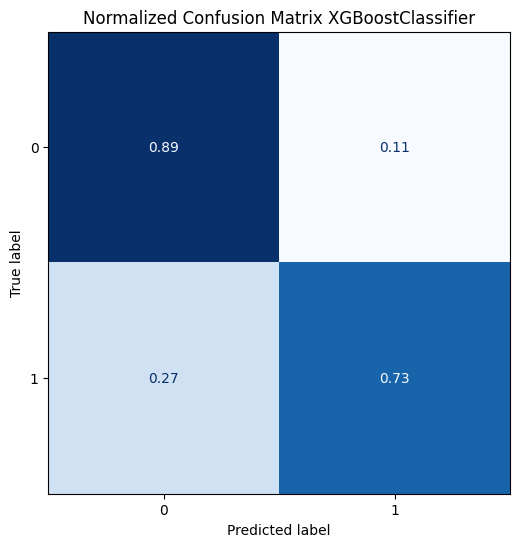

In [ ]:
y_pred_xgb = xgb_clf.predict(X_val)
confusion_matrix_plot(y_pred_xgb, y_val, labels, "XGBoostClassifier")

### Fine Tuning 생략

# Predict Test Set

In [ ]:
test_preds = xgb_clf.predict(test_data_hidden["hidden_states"])

In [ ]:
test_preds

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
test_df["predicted_label"] = test_preds

In [ ]:
test_df

,id,keyword,location,text,predicted_label
0,0,NaN,NaN,Just happened a terrible car crash,0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [ ]:
# os.remove("/kaggle/working/submission.csv")

In [ ]:
submission = pd.DataFrame({"id": test_df["id"], "target": test_preds})

In [ ]:
submission.to_csv("submission.csv", index=False)

0.8046